## Lab 3: Let create point maps of traffic accidents in Philadelphia
In the lab 1 and lab 2, we touch a little bit about using geopandas to open the shapefile of the traffic accidents in Philadelphia. This week we are going to know more in-depth info of how to use Python to open shapefile and plot point maps.

In this lab, you will learn something about read shapefile, the structure of dataframe, plot point map, 
 - Read shapefile, using geopandas to read the traffic accident map
 - Do explorative analysis of the traffic accident
 - Plot the traffic accident point maps

### Step 1: Prepare the shapefile and read shapefiles in geopandas
Make sure you can download the data folder from my github repository. Then copy the `data` folder to the save directory with your lab3 `.ipynb` file. If you failed to do this, you code will not be able to find your dataset. 

There are two shapefiles will be used in this lab work, the traffic accidents map, and the city boundary map. Both of these files can be downloaded from my github account. I collected these two files from philadelphia city government's website. For example, you can find the metadata of the accidents map from here, the metadata of the collision crash in Philadelphia is from, http://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c410c6431621f086214c7cd/

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt

# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crash_data_collision_crash_2007_2017.shp'
city_limit_shp = 'data/City_Limits.shp'

car_crash_df = gpd.read_file(crash_data_shp)
city_limit_df = gpd.read_file(city_limit_shp)

the geopandas will read the shapefile as a data frame with `geometry` column. You can print the first five rows by using `.head()`. This is used to let you check the data structure. 

In [3]:
car_crash_df.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96689999993436 40.08220000023073)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19459999988942 39.97510000036561)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21709999966458 40.03569999985604)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210000011426 39.95109999976609)


In [6]:
# print the all columns in the dataframe of accident data
car_crash_df.columns

Index(['county_nam', 'objectid_1', 'objectid', 'crn', 'district', 'county',
       'municipali', 'crash_year', 'crash_mont', 'day_of_wee', 'time_of_da',
       'hour_of_da', 'illuminati', 'weather', 'road_condi', 'collision_',
       'relation_t', 'work_zone_', 'work_zon_1', 'work_zon_2', 'intersect_',
       'tcd_type', 'location_t', 'urban_rura', 'fatal_coun', 'injury_cou',
       'person_cou', 'total_unit', 'sch_bus_in', 'sch_zone_i', 'latitude',
       'longitude', 'arrival_tm', 'cons_zone_', 'dispatch_t', 'est_hrs_cl',
       'lane_close', 'ln_close_d', 'ntfy_hiwy_', 'spec_juris', 'tcd_func_c',
       'tfc_detour', 'workers_pr', 'wz_close_d', 'wz_flagger', 'wz_ln_clos',
       'wz_moving', 'wz_other', 'wz_shlder_', 'vehicle_co', 'automobile',
       'motorcycle', 'bus_count', 'small_truc', 'heavy_truc', 'suv_count',
       'van_count', 'bicycle_co', 'maj_inj_co', 'mod_inj_co', 'min_inj_co',
       'tot_inj_co', 'unk_inj_de', 'unk_inj_pe', 'driver_cou', 'driver_c_1',
       'driver

### Step 2: Let's do a basic descriptive analysis of the data

Day of the Week code when crash occurred-
1 - Sunday
2 - Monday
3 - Tuesday
4 - Wednesday
5 - Thursday
6 - Friday
7 - Saturday

In [11]:
# we can group all rows by crash_year, crash month, crash data, and even crash hour
year_crash = car_crash_df.groupby('crash_year').size()
month_crash = car_crash_df.groupby('crash_mont').size()
week_crash = car_crash_df.groupby('day_of_wee').size()
hour_crash = car_crash_df.groupby('hour_of_da').size()

#### Let check the grouped result by hour

In [12]:
hour_crash = hour_crash[0:24]
hour_crash

hour_of_da
0     2242
1     1998
2     2424
3     1610
4     1176
5     1267
6     2158
7     3109
8     3880
9     3164
10    3107
11    3236
12    3758
13    3716
14    3902
15    4806
16    4960
17    4762
18    4341
19    3530
20    3038
21    2760
22    2617
23    2578
dtype: int64

### plot the graphic of the traffic accident

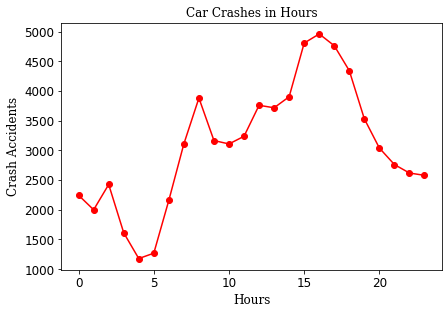

In [13]:
import matplotlib

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

matplotlib.rcParams['figure.figsize'] = (15.0, 10)
ax1 = plt.subplot(221)

markeron = range(0,23)
ax1.plot(hour_crash[0:24],color='red', marker = 'o')

ax1.set_title('Car Crashes in Hours', fontdict=font)
ax1.set_xlabel('Hours', fontdict=font)
ax1.set_ylabel('Crash Accidents', fontdict=font)
ax1.tick_params(axis='x', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax1.tick_params(axis='y', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
# set_axis_style(ax2, weeklabel)

# plt.savefig('./figure/fig_num_trips.png',transparent=False,bbox_inches='tight')
# plt.show()


Change the style of the graphic

In [18]:
import matplotlib

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

ax1.plot(hour_crash[0:24],markevery=markeron, color='red', marker = 'o')


ax1.set_title('Car Crashes in Hours', fontdict=font)
ax1.set_xlabel('Hours', fontdict=font)
ax1.set_ylabel('Crash Accidents', fontdict=font)
# ax1.plot(week_crash, linewidth=2.5, color = 'red', linestyle='-')
# ax1.scatter(week_crash.index, week_crash, marker = 'o', s = 45, color='red')
ax1.tick_params(axis='x', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax1.tick_params(axis='y', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
# set_axis_style(ax2, weeklabel)



# plt.text(pick_loc(xmin,xmax,-0.08), pick_loc(ymin,ymax,1.08), '(B)', ha='center', va='center',fontsize=12)
# plt.legend(days_simple,loc=2)

# #plt.figlegend(ax,days_simple,loc='upper center',ncol = 7)
# plt.savefig('./figure/fig_num_trips.eps',transparent=False,bbox_inches='tight')
# plt.savefig('./figure/fig_num_trips.png',transparent=False,bbox_inches='tight')
# plt.show()


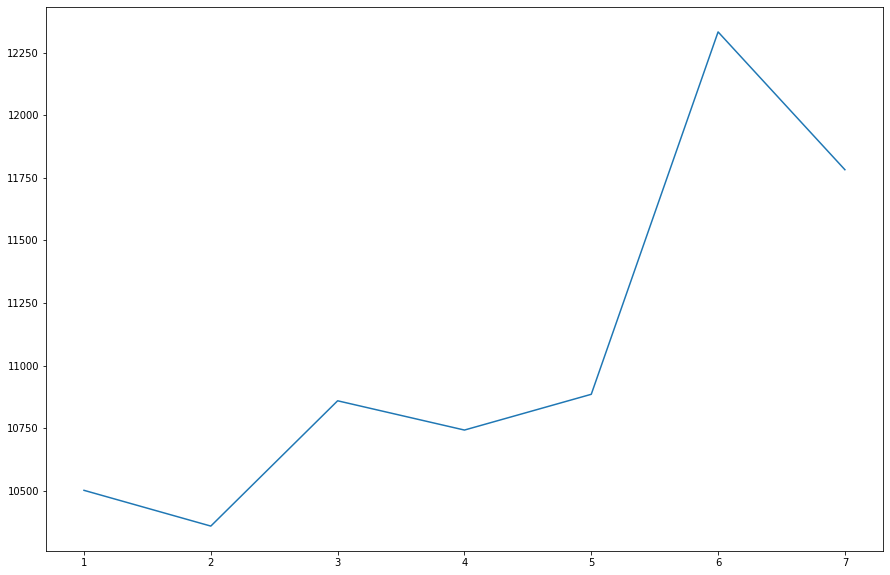

In [19]:
plt.plot(week_crash)

[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

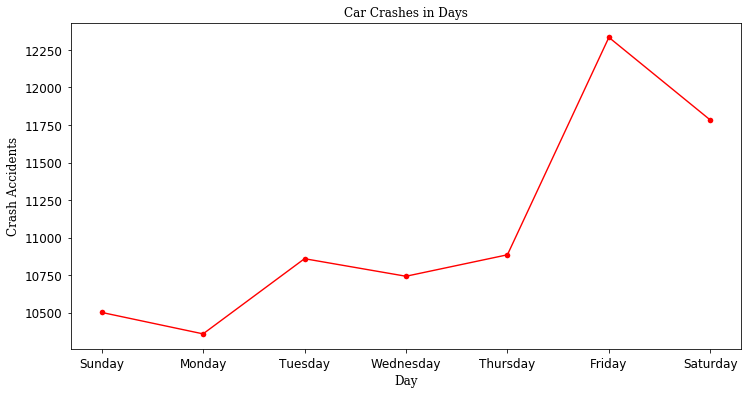

In [49]:
import matplotlib

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

f, ax = plt.subplots(1, figsize=(12, 6))

weeklabel = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax.plot(weeklabel, week_crash, color='red', marker = 'o')
ax.set_title('Car Crashes in Days', fontdict=font)
ax.set_xlabel('Day', fontdict=font)
ax.set_ylabel('Crash Accidents', fontdict=font)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax.tick_params(axis='y', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax.set_xticklabels(weeklabel)

# plt.savefig('./figure/fig_num_trips.png',transparent=False,bbox_inches='tight')
# plt.show()


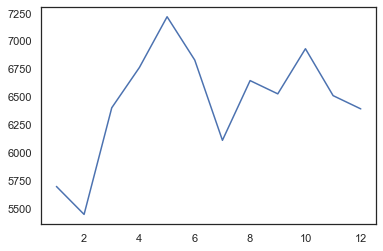

In [64]:
plt.plot(month_crash)

In [65]:
type(hour_crash)

pandas.core.series.Series

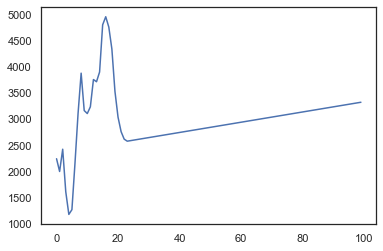

In [54]:
plt.plot(hour_crash)

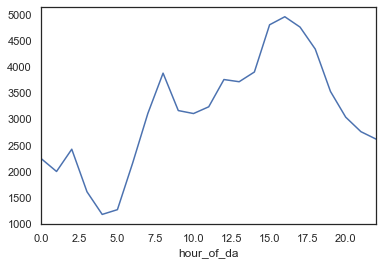

In [71]:
hour_crash[0:23].plot()

### Step 3: Mapping time, create map of the location of car crashes in Philadelphia

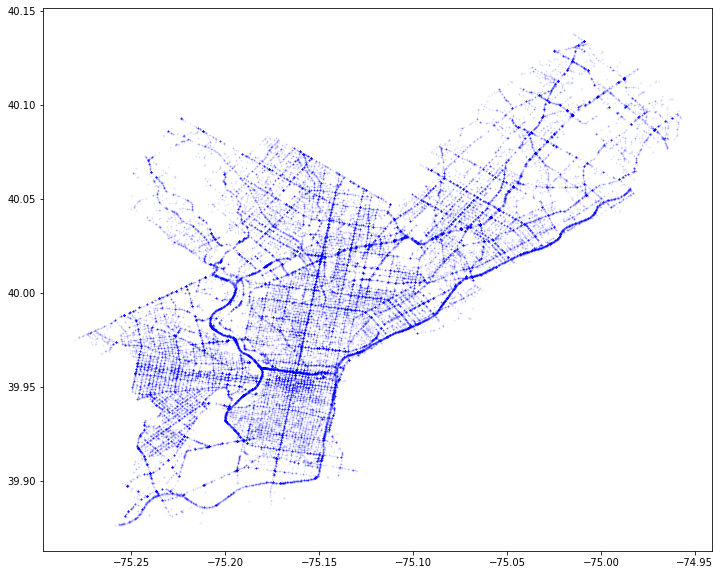

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12, 12))

car_crash_df.plot(marker='*', ax=ax, color='blue', alpha = 0.1, markersize=1);
plt.show()


#### Plot the city limit boundary

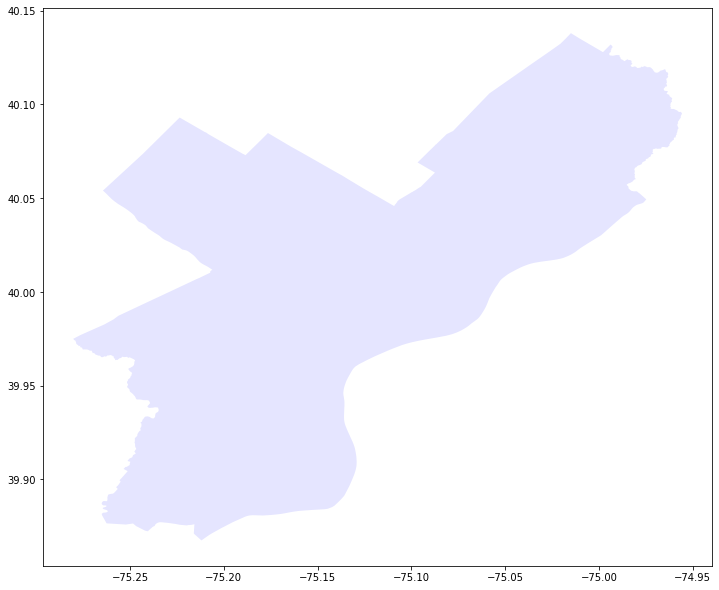

In [21]:
fig, ax = plt.subplots(1, figsize=(12, 12))

city_limit_df.plot( color='blue', ax=ax, alpha = 0.1, markersize=1);
plt.show()


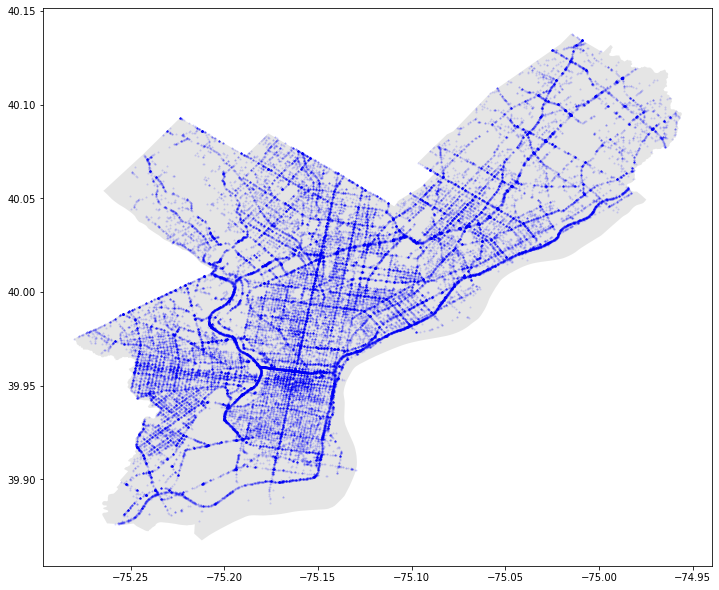

In [116]:
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = city_limit_df.plot(color='grey', ax=ax, alpha = 0.2)
car_crash_df.plot(marker='*', ax=ax, color='blue', alpha = 0.1, markersize=2, legend=True)

plt.show(fig)


In [66]:
car_crash_df.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96689999993436 40.08220000023073)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19459999988942 39.97510000036561)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21709999966458 40.03569999985604)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210000011426 39.95109999976609)


In [86]:
crash15 = car_crash.loc[car_crash['crash_year']==2015]
crash16 = car_crash.loc[car_crash['crash_year']==2016]
crash17 = car_crash.loc[car_crash['crash_year']==2017]

0    2016
1    2016
2    2016
3    2016
4    2016
Name: crash_year, dtype: int64

In [93]:
color

'red'

### The color bar plettee can be found here, 
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

The crash year is: 2016
The crash year is: 2017
The crash year is: 2015
The crash year is: 2014
The crash year is: 2013
The color is Red
The crash year is: 2012
The color is Green
The crash year is: 2011
The color is Blue


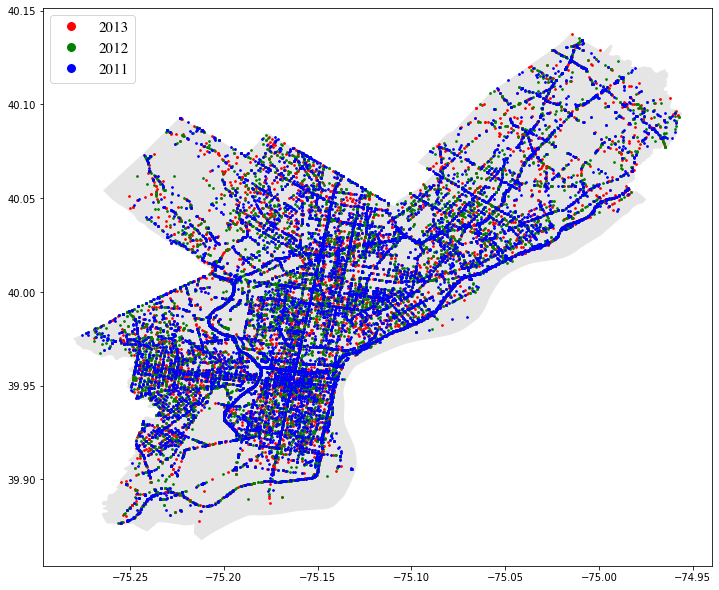

In [16]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager


fig, ax = plt.subplots(1, figsize=(12, 12))

ax = city_limit_df.plot(color='grey', ax=ax, alpha = 0.2)
colors = ['Red', 'Green', 'Blue', 'Cyan', 'Grey', 'Black', 'Green']
i = 0

legend_lst = []
legend_att = []

for crash_year in car_crash_df['crash_year'].unique():
    print('The crash year is:', crash_year)
    if crash_year > 2013:
        continue
    
    color = colors[i]
    i = i + 1
    
    print('The color is', color)
    crash_year_df = car_crash_df.loc[car_crash_df['crash_year'] == crash_year]
    
    crash_plt = crash_year_df.plot(marker='o',
                      markersize=3,
                      ax=ax, 
                      color=color, 
                      alpha = 1, 
                      legend = True,
                      label="population",
                    )

    # create legend
    red_patch = Line2D([0], [0], marker='o', 
                        color='w', 
                        label=crash_year,
                        markerfacecolor=color, 
                        markersize=10
                      )
    legend_lst.append(red_patch)

    
font = font_manager.FontProperties(family='Times',
                                       size= 15,
                                       weight='bold',
                                       style='normal' 
                                   )
# blue_patch = mpatches.Patch(color='blue', hatch = '', label='The red data')
crash_plt = plt.legend(handles=legend_lst, loc='upper left', prop=font)

plt.show()


## Homework
Create the map of car crash in 2015 on Monday

Hint: 

crash15 = car_crash_df.loc[car_crash_df['crash_year']==2015]

crash15_monday = crash15.loc[crash15['day_of_wee']==2]

crash15_monday.head()
